**LR - Train&Test**

Linear Regression is considered as the mostt interpretable machine learning algorithm. But, since we are working on a classification task, we chooce logistic regression to determind the gold features. Logistic regression, in the same way as linear regression, is considered an interpretable model.

Reference source: [Text Mining and Sentiment Analysis for Yelp Reviews of A Burger Chain](https://towardsdatascience.com/text-mining-and-sentiment-analysis-for-yelp-reviews-of-a-burger-chain-6d3bcfcab17b)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import seaborn as sn
import pandas as pd
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

**Train/Test the model**

In [ ]:
#read train/test data
train = pd.read_csv("/content/drive/MyDrive/MasterThesis/Dataset/X_train_all.csv")
test = pd.read_csv("/content/drive/MyDrive/MasterThesis/Dataset/X_test_all.csv")
train_label = pd.read_csv("/content/drive/MyDrive/MasterThesis/Dataset/y_train_all.csv")
test_label = pd.read_csv("/content/drive/MyDrive/MasterThesis/Dataset/y_test_all.csv")
y_train = train_label.rate
y_test = test_label.rate

In [ ]:
#text representation
tfidf_vectorizer = TfidfVectorizer(max_df=0.99, min_df=0.01)
tfidf_vectorizer.fit(train.clean_review.astype(str))

X_train_tfidf = tfidf_vectorizer.transform(train.clean_review.astype(str))
X_test_tfidf = tfidf_vectorizer.transform(test.clean_review.astype(str))

print(X_train_tfidf.shape, X_test_tfidf.shape)

(16331, 772) (4083, 772)


In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
y_pred = model_lr.predict(X_test_tfidf)

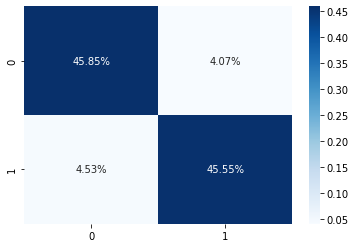

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2038
           1       0.92      0.91      0.91      2045

    accuracy                           0.91      4083
   macro avg       0.91      0.91      0.91      4083
weighted avg       0.91      0.91      0.91      4083



**Most Important Featured - Gold Features**

In [ ]:
X_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_df.shape

(16331, 772)

In [ ]:
log_odds = model_lr.coef_[0]
coeff = pd.DataFrame(log_odds, X_df.columns, columns=['coef'])\
            .sort_values(by='coef', ascending=False) #True to see the most negative words

In [ ]:
#ten most important features for positive sentiment
coeff.head(10)

,coef
delicious,7.675071
great,6.838186
amazing,6.811352
awesome,5.711403
excellent,5.658225
best,5.336681
definitely,4.941272
love,4.813121
favorite,4.320796
perfect,4.265120


In [ ]:
#ten most important features for negative sentiment
coeff.tail(10)

,coef
awful,-3.764178
unfortunately,-3.999839
horrible,-4.163913
mediocre,-4.325707
terrible,-4.410119
disappointing,-4.413146
rude,-4.428438
bland,-5.387281
worst,-5.936323
not,-6.462692


In [ ]:
print('great: ', coeff.loc['great'].coef)
print('good: ', coeff.loc['good'].coef)
print('service: ', coeff.loc['service'].coef)
print('not: ', coeff.loc['not'].coef)
print('food: ', coeff.loc['food'].coef)
print('place: ', coeff.loc['place'].coef)

great:  6.838186427960663
good:  3.6109500477929632
service: 0.0146869525382047
not:  -6.462692354623749
food:  -1.70715952123254
place:  -0.35671200311579704
